In [1]:
import pandas as pd
import numpy as np
from scipy import stats


In [2]:
data = pd.read_csv('comparison_new.csv')

In [3]:
data = data.apply(pd.to_numeric, errors='coerce')

In [4]:
data.fillna(data.mean(), inplace=True)

In [5]:
data = data.drop(index = 11)

In [6]:
data_VGP = data[data.Player_ID < 2000]
data_NVGP = data[data.Player_ID > 2000]

In [7]:
data.loc[data.Player_ID < 2000, 'expertise_group'] = 'VGP'
data.loc[data.Player_ID > 2000, 'expertise_group'] = 'NVGP'

In [8]:
num_features = len(data.columns) - 2
cols = data.columns

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


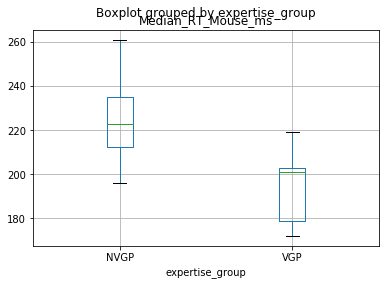

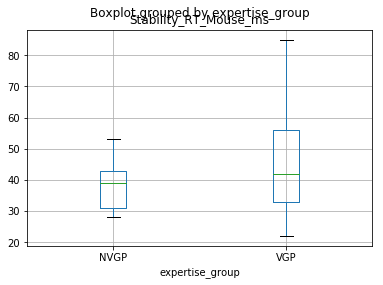

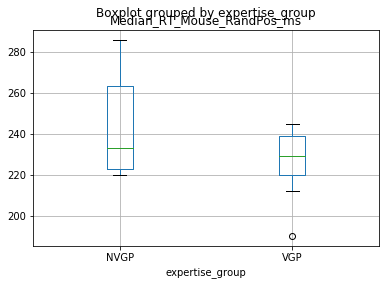

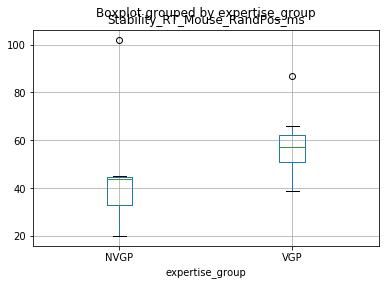

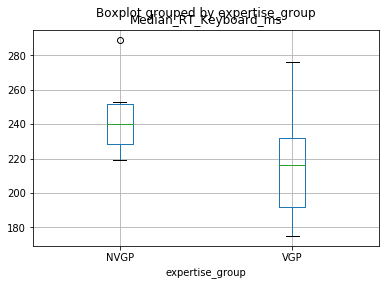

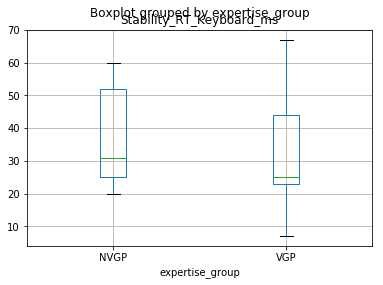

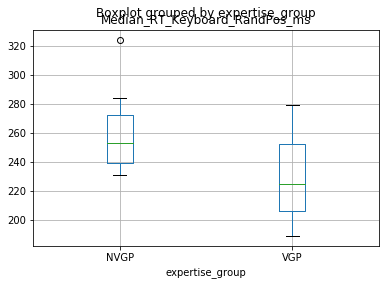

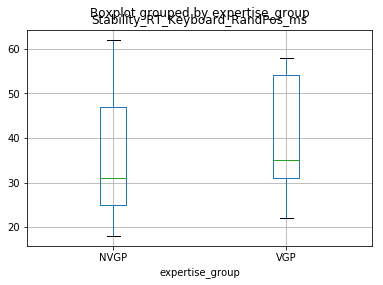

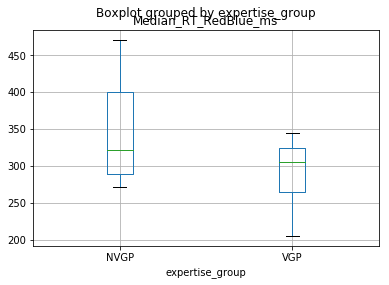

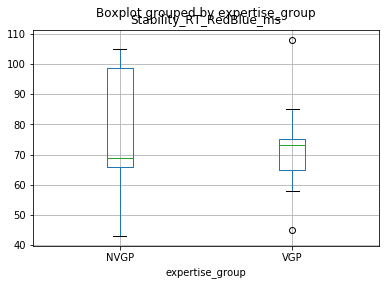

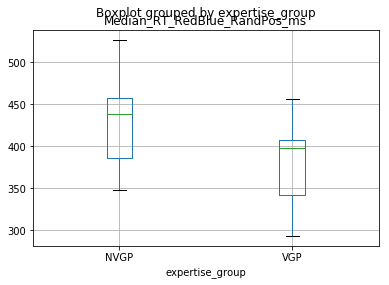

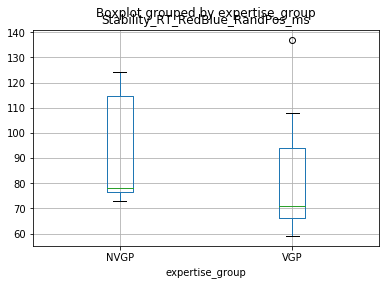

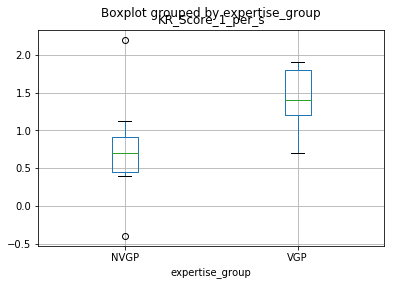

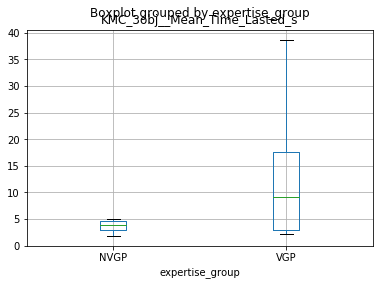

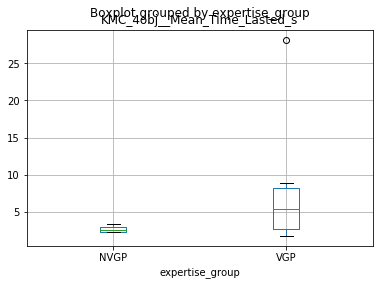

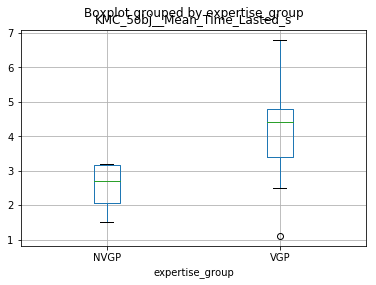

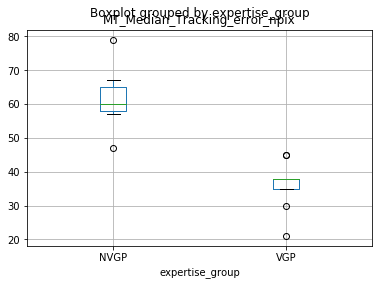

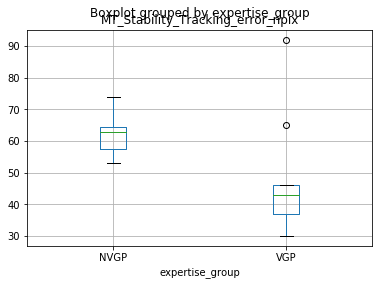

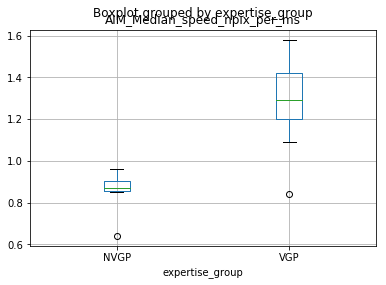

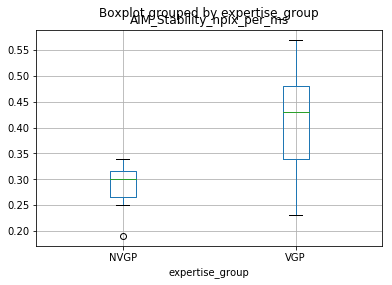

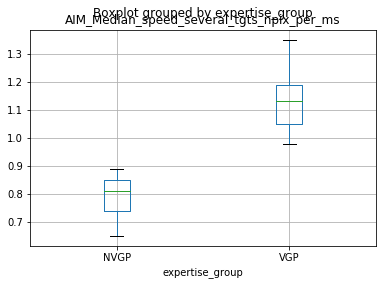

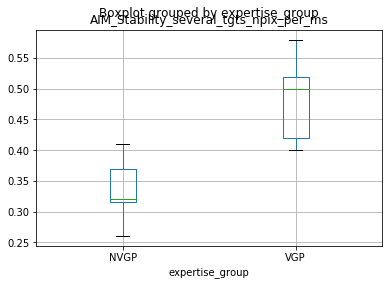

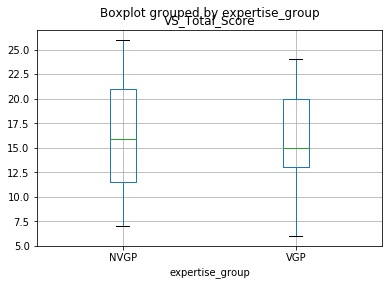

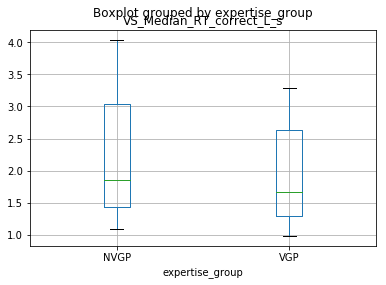

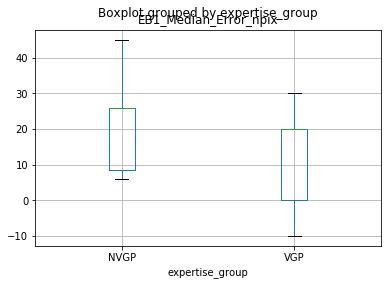

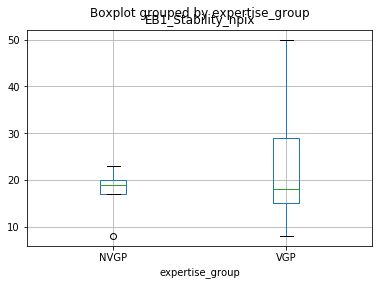

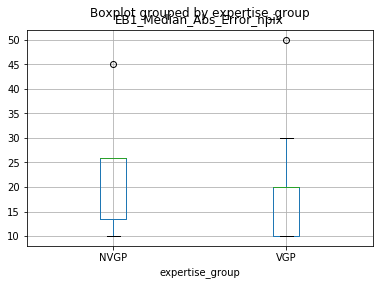

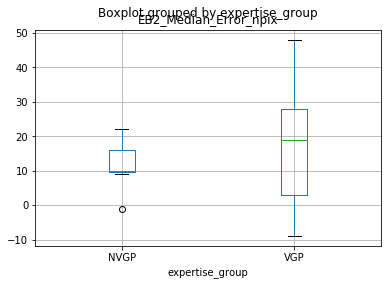

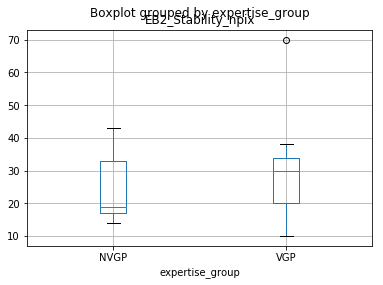

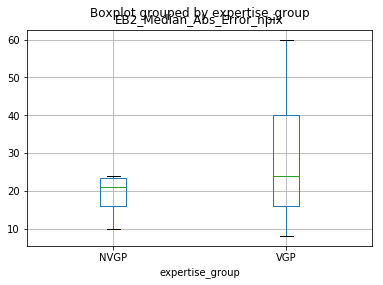

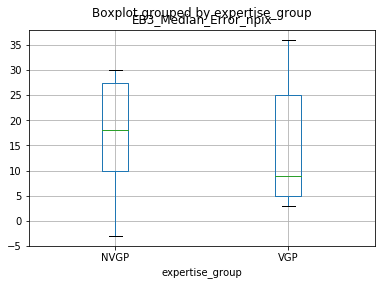

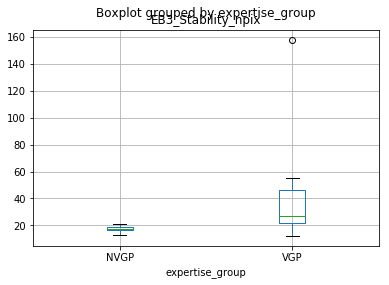

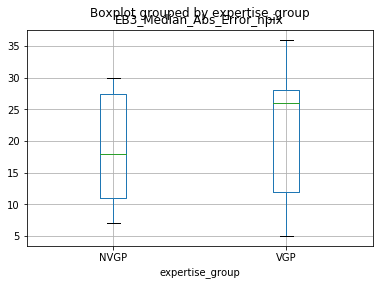

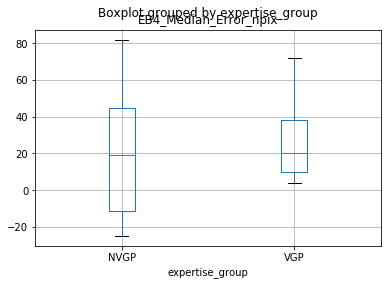

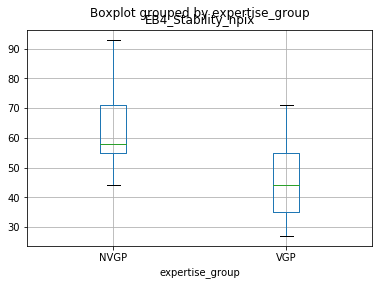

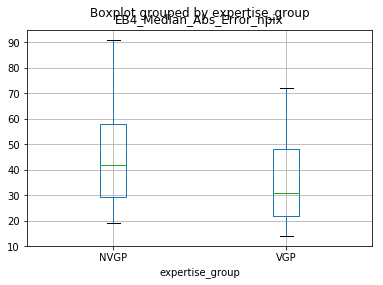

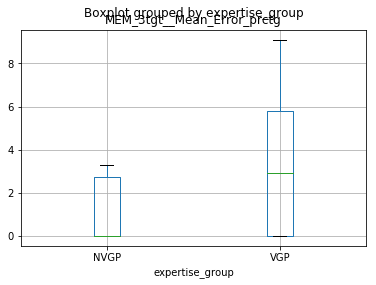

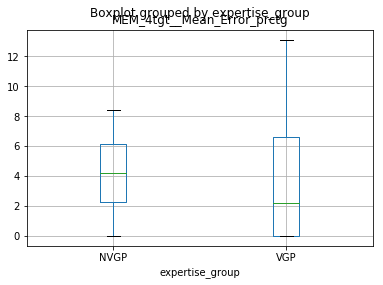

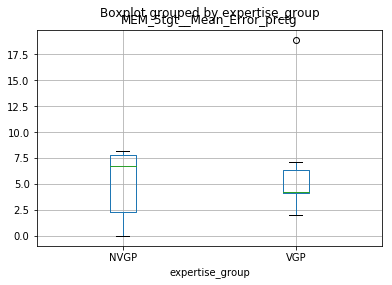

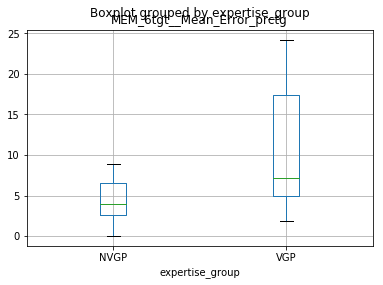

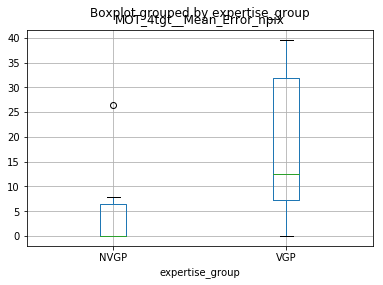

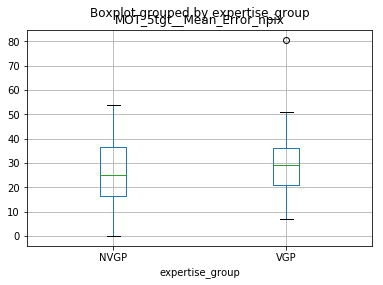

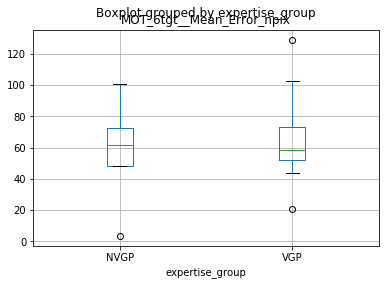

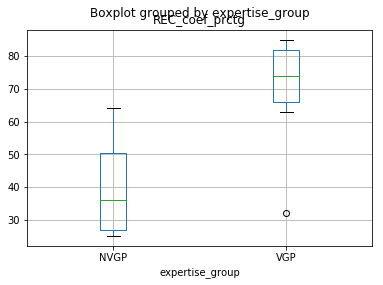

In [9]:
for plot_idx in range(num_features):
    col_name = cols[plot_idx+1]
    data.boxplot(col_name, by='expertise_group', figsize=(6, 4))

In [9]:
k = len(pd.unique(data.expertise_group))
N = len(data.values)

In [10]:
good_feat = 0
grps = pd.unique(data.expertise_group.values)
for feature_idx in range(num_features):
    col_name = cols[feature_idx+1]
    d_data = {grp:data[col_name][data.expertise_group == grp] for grp in grps}
    F, p = stats.f_oneway(d_data['NVGP'], d_data['VGP'])
    
    gf_str = 'No '
    if F >= 4.5431 and p <= 0.05:
        good_feat = good_feat + 1
        gf_str = 'Yes'
        
    print('% 45s : F = % .2f, p = % .3f % 3s' %(col_name, F, p, gf_str))
    

                           Median_RT_Mouse_ms : F =  13.08, p =  0.003 Yes
                        Stability_RT_Mouse_ms : F =  0.80, p =  0.387 No 
                   Median_RT_Mouse_RandPos_ms : F =  2.82, p =  0.117 No 
                Stability_RT_Mouse_RandPos_ms : F =  0.58, p =  0.458 No 
                        Median_RT_Keyboard_ms : F =  4.86, p =  0.046 Yes
                     Stability_RT_Keyboard_ms : F =  0.56, p =  0.467 No 
                Median_RT_Keyboard_RandPos_ms : F =  3.27, p =  0.094 No 
             Stability_RT_Keyboard_RandPos_ms : F =  0.03, p =  0.869 No 
                         Median_RT_RedBlue_ms : F =  3.33, p =  0.091 No 
                      Stability_RT_RedBlue_ms : F =  0.41, p =  0.531 No 
                 Median_RT_RedBlue_RandPos_ms : F =  3.71, p =  0.076 No 
              Stability_RT_RedBlue_RandPos_ms : F =  0.38, p =  0.548 No 
                             KR_Score_1_per_s : F =  14.89, p =  0.002 Yes
                 KMC_3obj__Mean_Time

In [11]:
data

,Player_ID,Median_RT_Mouse_ms,Stability_RT_Mouse_ms,Median_RT_Mouse_RandPos_ms,Stability_RT_Mouse_RandPos_ms,Median_RT_Keyboard_ms,Stability_RT_Keyboard_ms,Median_RT_Keyboard_RandPos_ms,Stability_RT_Keyboard_RandPos_ms,Median_RT_RedBlue_ms,...,EB4_Median_Abs_Error_npix,MEM_3tgt__Mean_Error_prctg,MEM_4tgt__Mean_Error_prctg,MEM_5tgt__Mean_Error_prctg,MEM_6tgt__Mean_Error_prctg,MOT_4tgt__Mean_Error_npix,MOT_5tgt__Mean_Error_npix,MOT_6tgt__Mean_Error_npix,REC_coef_prctg,expertise_group
0,1,180,33,190,45,175,25,189,31,205,...,38,3.5,0.0,4.1,6.6,7.3,30.9,43.8,83.000000,VGP
1,2,179,42,212,87,195,67,279,56,265,...,48,6.3,6.9,2.1,7.1,12.4,21.0,52.2,66.000000,VGP
2,3,172,41,239,62,221,25,223,54,288,...,22,0.0,0.0,4.5,3.6,0.0,12.6,58.5,82.000000,VGP
3,4,202,31,226,51,276,44,252,38,307,...,31,9.1,6.6,7.1,1.8,26.9,36.1,72.9,72.000000,VGP
4,6,203,43,230,57,192,7,206,25,324,...,30,0.0,0.0,2.0,5.0,0.0,24.4,20.4,85.000000,VGP
5,22,179,85,220,59,191,30,206,35,337,...,72,5.8,13.1,4.2,24.2,31.9,80.7,129.1,63.000000,VGP
6,23,217,22,242,66,216,15,236,22,265,...,14,0.0,6.4,18.9,17.4,12.6,29.3,53.9,74.000000,VGP
7,24,201,69,245,39,232,64,225,31,306,...,21,0.0,2.2,6.4,23.4,32.8,7.1,64.7,32.000000,VGP
8,25,219,56,229,54,239,23,265,58,345,...,56,2.9,0.0,4.2,12.2,39.6,50.8,102.4,74.000000,VGP
9,2008,222,42,244,102,238,26,241,20,304,...,19,2.3,0.0,2.0,1.5,0.0,14.0,48.0,26.000000,NVGP


In [12]:
feature_cols = data.columns[1:44]

In [13]:
X = data[feature_cols]

In [14]:
y = pd.factorize(data['expertise_group'])[0]

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.model_selection import LeaveOneOut 
loo = LeaveOneOut()
loo.get_n_splits(X)

15

In [36]:
feature_importance = np.zeros((loo.get_n_splits(X), np.size(X, axis = 1)))

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = RandomForestClassifier(n_jobs=2, random_state=0)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print('predicted: ', y_predict[0], '; real: ', y_test[0])
    feature_importance[test_index, :] = clf.feature_importances_

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [0]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  0 ; real:  0
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [1]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  0 ; real:  0
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [2]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  0 ; real:  0
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14] TEST: [3]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  0 ; real:  0
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14] TEST: [4]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  0 ; real:  0
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14] TEST: [5]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  0 ; real:  0
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14] TEST: [6]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  0 ; real:  0
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14] TEST: [7]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  0 ; real:  0
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14] TEST: [8]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  0 ; real:  0
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14] TEST: [9]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  1 ; real:  1
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14] TEST: [10]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  0 ; real:  1
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14] TEST: [11]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  1 ; real:  1
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14] TEST: [12]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  1 ; real:  1
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14] TEST: [13]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  1 ; real:  1
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14]


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predicted:  1 ; real:  1


In [38]:
imshow(feature_importance)

NameError: name 'imshow' is not defined

In [20]:
data

,Player_ID,Median_RT_Mouse_ms,Stability_RT_Mouse_ms,Median_RT_Mouse_RandPos_ms,Stability_RT_Mouse_RandPos_ms,Median_RT_Keyboard_ms,Stability_RT_Keyboard_ms,Median_RT_Keyboard_RandPos_ms,Stability_RT_Keyboard_RandPos_ms,Median_RT_RedBlue_ms,...,EB4_Median_Abs_Error_npix,MEM_3tgt__Mean_Error_prctg,MEM_4tgt__Mean_Error_prctg,MEM_5tgt__Mean_Error_prctg,MEM_6tgt__Mean_Error_prctg,MOT_4tgt__Mean_Error_npix,MOT_5tgt__Mean_Error_npix,MOT_6tgt__Mean_Error_npix,REC_coef_prctg,expertise_group
0,1,180,33,190,45,175,25,189,31,205,...,38,3.5,0.0,4.1,6.6,7.3,30.9,43.8,83.000000,VGP
1,2,179,42,212,87,195,67,279,56,265,...,48,6.3,6.9,2.1,7.1,12.4,21.0,52.2,66.000000,VGP
2,3,172,41,239,62,221,25,223,54,288,...,22,0.0,0.0,4.5,3.6,0.0,12.6,58.5,82.000000,VGP
3,4,202,31,226,51,276,44,252,38,307,...,31,9.1,6.6,7.1,1.8,26.9,36.1,72.9,72.000000,VGP
4,6,203,43,230,57,192,7,206,25,324,...,30,0.0,0.0,2.0,5.0,0.0,24.4,20.4,85.000000,VGP
5,22,179,85,220,59,191,30,206,35,337,...,72,5.8,13.1,4.2,24.2,31.9,80.7,129.1,63.000000,VGP
6,23,217,22,242,66,216,15,236,22,265,...,14,0.0,6.4,18.9,17.4,12.6,29.3,53.9,74.000000,VGP
7,24,201,69,245,39,232,64,225,31,306,...,21,0.0,2.2,6.4,23.4,32.8,7.1,64.7,32.000000,VGP
8,25,219,56,229,54,239,23,265,58,345,...,56,2.9,0.0,4.2,12.2,39.6,50.8,102.4,74.000000,VGP
9,2008,222,42,244,102,238,26,241,20,304,...,19,2.3,0.0,2.0,1.5,0.0,14.0,48.0,26.000000,NVGP


In [19]:
data.iloc[11]

Player_ID                                       2011
Median_RT_Mouse_ms                               228
Stability_RT_Mouse_ms                             28
Median_RT_Mouse_RandPos_ms                       220
Stability_RT_Mouse_RandPos_ms                     20
Median_RT_Keyboard_ms                            250
Stability_RT_Keyboard_ms                          24
Median_RT_Keyboard_RandPos_ms                    253
Stability_RT_Keyboard_RandPos_ms                  62
Median_RT_RedBlue_ms                             272
Stability_RT_RedBlue_ms                           43
Median_RT_RedBlue_RandPos_ms                     398
Stability_RT_RedBlue_RandPos_ms                   75
KR_Score_1_per_s                                -0.4
KMC_3obj__Mean_Time_Lasted_s                     4.5
KMC_4obj__Mean_Time_Lasted_s                     2.2
KMC_5obj__Mean_Time_Lasted_s                     2.7
MT_Median_Tracking_error_npix                     47
MT_Stability_Tracking_error_npix              

In [18]:
import pandas as pd
datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile)
 
#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))
 
ctrl = data['weight'][data.group == 'ctrl']
 
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}
 
k = len(pd.unique(data.group))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('group').size()[0] #Participants in each condition

In [26]:
F

4.846087862380136

In [27]:
p

0.0159099583256229

In [41]:
F(1,14)

29

In [33]:
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

In [35]:
SSbetween = (sum(data.groupby('group').sum()['weight']**2)/n) \
    - (data['weight'].sum()**2)/N 

sum_y_squared = sum([value**2 for value in data['weight'].values])
SSwithin = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)/n

SStotal = sum_y_squared - (data['weight'].sum()**2)/N

MSbetween = SSbetween/DFbetween

MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin

p = stats.f.sf(F, DFbetween, DFwithin)

eta_sqrd = SSbetween/SStotal

om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

In [15]:
a = [22, 21, 24,23,20,17,20,21,23,26]

In [23]:
nvpg = [30, 27, 23, 22, 27, 24, 22]

In [24]:
import numpy as np

In [25]:
np.mean(nvpg)

25.0

In [18]:
np.mean(a)

21.7

In [14]:
good_feat

10

In [13]:
F

18.985610168726